Library Imports

In [2]:
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns

Data Load

In [3]:
data = pd.read_csv("./Bakery.csv")

Data Pre-processing

In [4]:
# Add new attribute, Month, converting datetime to month
data["DateTime"] = pd.to_datetime(data["DateTime"])
data["Month"] = data['DateTime'].dt.month
data['Month'] = data['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

In [5]:
# Add new attribute, Month, converting datetime to weekday
data['Weekday'] = data['DateTime'].dt.weekday
data['Weekday'] = data['Weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

Data Exploration

In [3]:
data.columns

Index(['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType'], dtype='object')

In [4]:
data.shape

(20507, 5)

In [5]:
# All the bakery items
items = data["Items"].unique()
print(items)
print("Total: ",len(items))

['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry shortbread sandwich' 'Extra

In [6]:
# Looking at frequent items and see which sells the most
itemFrequency = data["Items"].value_counts().sort_values(ascending=False)
itemFrequency = itemFrequency.head(20)
itemFrequency

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: Items, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [8]:
data.describe(include=object)

,Items,DateTime,Daypart,DayType
count,20507,20507,20507,20507
unique,94,9465,4,2
top,Coffee,2017-02-17 14:18:20,Afternoon,Weekday
freq,5471,11,11569,12807


In [9]:
data.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [10]:
# Check if there ae any null values or not
data.isnull().values.any()

False

In [11]:
# Total transactions
data["TransactionNo"].nunique()

9465

In [12]:
itemFrequency.head(20).index

Index(['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'Sandwich', 'Medialuna',
       'Hot chocolate', 'Cookies', 'Brownie', 'Farm House', 'Muffin',
       'Alfajores', 'Juice', 'Soup', 'Scone', 'Toast', 'Scandinavian',
       'Truffles', 'Coke'],
      dtype='object')

Data Visualization

Text(0.5, 1.0, 'Top 20 Frequently Purchased Items')

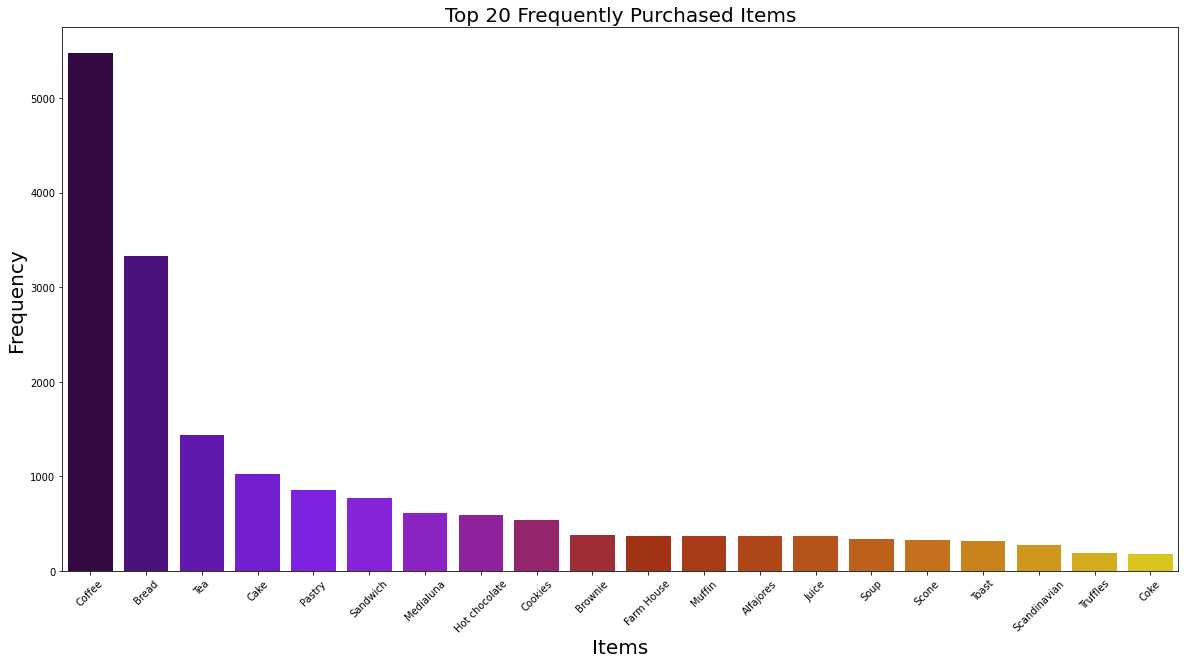

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(x=itemFrequency.index, y=itemFrequency, palette="gnuplot")
plt.xlabel("Items", size=20)
plt.xticks(rotation=45)
plt.ylabel("Frequency", size=20)
plt.title("Top 20 Frequently Purchased Items", size=20)


Text(0.5, 1.0, 'Number of orders per month')

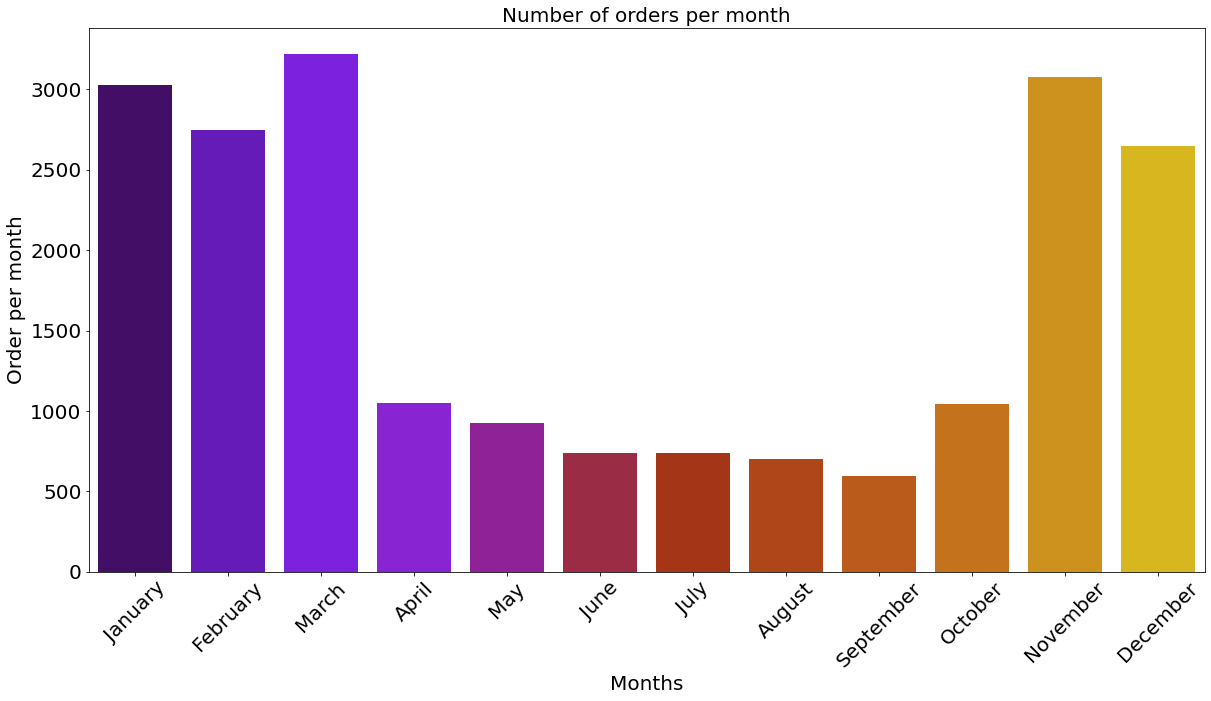

In [39]:
monthlyTransaction = data.groupby("Month")["TransactionNo"].count().reset_index()
monthlyTransaction.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthlyTransaction.sort_values("monthorder",inplace=True)

plt.figure(figsize=(20,10))
sns.barplot(x=monthlyTransaction["Month"], y=monthlyTransaction["TransactionNo"], palette="gnuplot")
plt.xlabel("Months", size=20)
plt.xticks(rotation=45, size=20)
plt.yticks(size=20)
plt.ylabel("Order per month", size=20)
plt.title("Number of orders per month", size=20)


In [ ]:
# We have more transactions in Janurary, Feburary, March, November, December
# This is because those months are Winter season in UK and people probably drink
# coffee during this season

Text(0.5, 1.0, 'Number of orders per day')

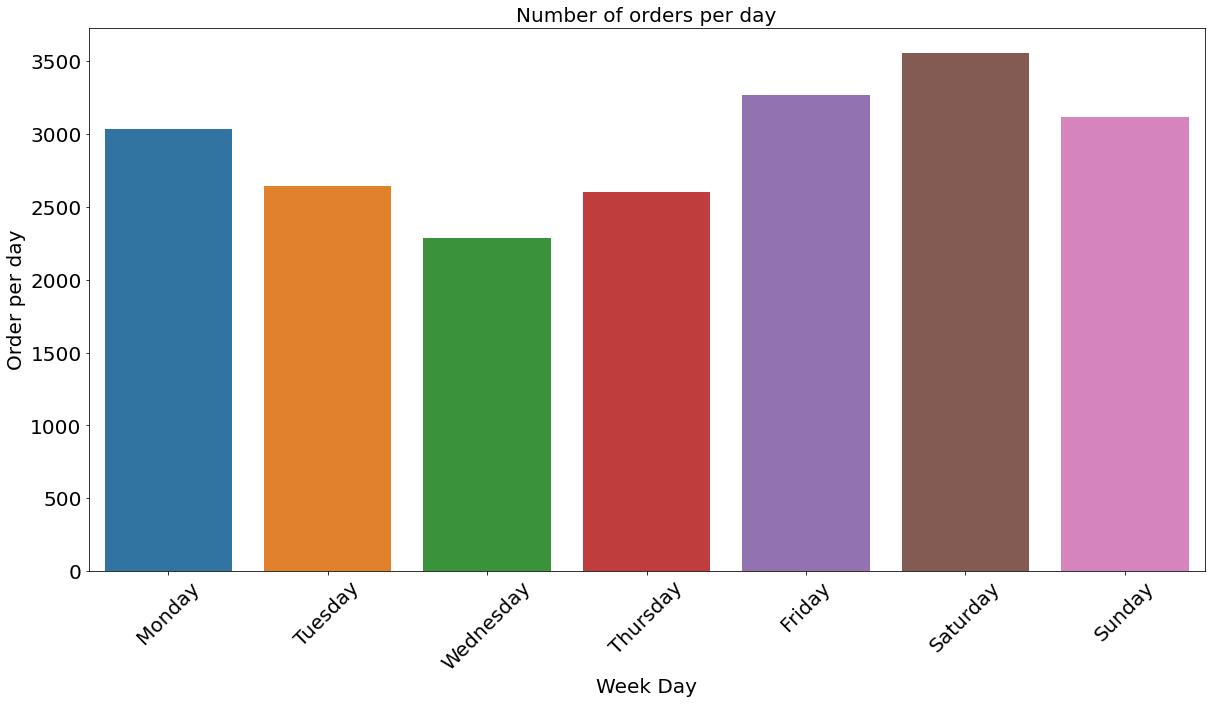

In [46]:
weeklyTransactions = data.groupby("Weekday")["TransactionNo"].count().reset_index()
weeklyTransactions.loc[:,"WeekdayOrder"] = [4,0,5,6,3,1,2]
weeklyTransactions.sort_values("WeekdayOrder",inplace=True)

plt.figure(figsize=(20,10))
sns.barplot(x=weeklyTransactions["Weekday"], y=weeklyTransactions["TransactionNo"])
plt.xlabel("Week Day", size=20)
plt.xticks(rotation=45, size=20)
plt.yticks(size=20)
plt.ylabel("Order per day", size=20)
plt.title("Number of orders per day", size=20)

In [66]:
dailyFrequentItem = data.groupby(["Daypart", "Items"])["TransactionNo"].count().reset_index()
dailyFrequentItem.sort_values(["Daypart", "TransactionNo"], ascending=False, inplace=True)
dailyFrequentItem

,Daypart,Items,TransactionNo
222,Night,Vegan Feast,7
217,Night,Hot chocolate,2
221,Night,Valentine's card,2
218,Night,Juice,1
219,Night,Mineral water,1
...,...,...,...
41,Afternoon,Hack the stack,1
55,Afternoon,Mortimer,1
60,Afternoon,Olum & polenta,1
64,Afternoon,Polenta,1


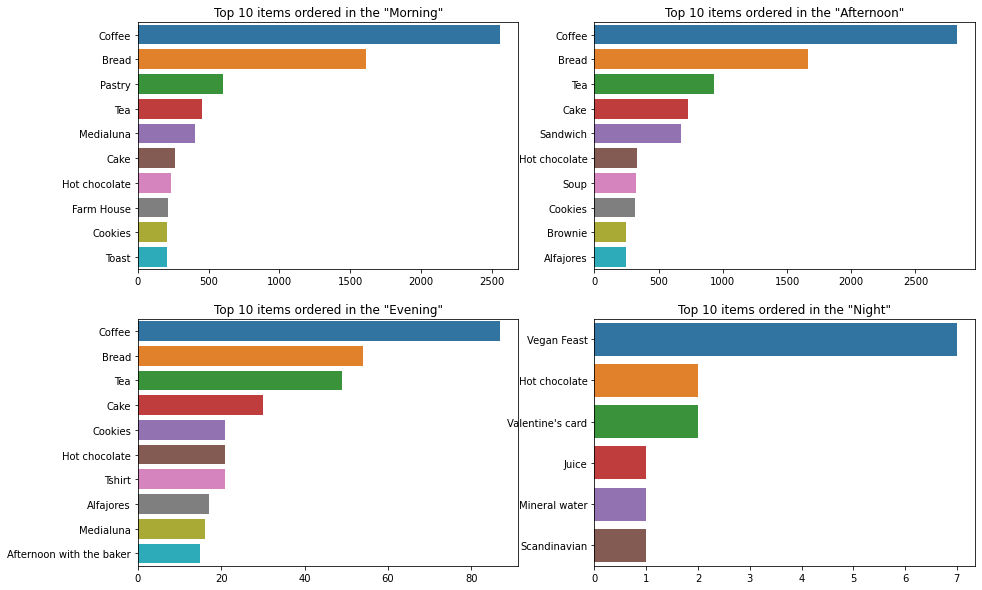

In [80]:
day = ["Morning", "Afternoon", "Evening", "Night"]

plt.figure(figsize=(15,10))

for i, day in enumerate(day):
    plt.subplot(2,2,i+1)
    dayData = dailyFrequentItem[dailyFrequentItem["Daypart"] == day].head(10)
    sns.barplot(x=dayData["TransactionNo"],y=dayData["Items"])
    plt.xlabel("")
    plt.ylabel("")
    plt.title('Top 10 items ordered in the "{}"'.format(day))
plt.show()

Apriori Algorithm

In [6]:
basket = data.groupby(["TransactionNo", "Items"])["Items"].count().reset_index(name="Count")
basket.head(10)

,TransactionNo,Items,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
5,4,Muffin,1
6,5,Bread,1
7,5,Coffee,1
8,5,Pastry,1
9,6,Medialuna,1


In [7]:
transactions = []

for i in basket["TransactionNo"]:
    transactionItems = basket[basket["TransactionNo"] == i]["Items"].to_list()
    transactions.append(transactionItems)

In [8]:
len(transactions)

18887

In [26]:
# Create a M x N matrix where M = TransactionNo and N = Items, each row
# will represent if an item occurs or not. If it does, then it will contains
# its frequency
# basket = transactions.pivot_table(index="TransactionNo", columns="Items", values="Count").fillna(0)
# basket.head(5)

In [97]:
# Apply encoding to the basket
# If an item appears in the transaction, it is represented as "1"
# If an item does not appear in the transactions, it is represented as "0"

def encode(x):
    if x >= 1:
        return 1
    if x <= 0:
        return 0
    
basket = basket.applymap(encode)
basket.to_csv("./basket.csv")

In [16]:
'''
In order to create association rules, we must find optimal threshold for support
and confidence. If the values are too low, it will take long and we will get a
lot of rules. If the values are too high, we may miss important associations and 
get low amount of rules

We will try various support values -> 0.5%, 1%, 5%, 10%
For each support value, we will try confidence values -> 0.1 to 90%
'''

allRulesCount = []
rulesCount = []
confidenceList = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# min_support = 0.5% 
for confidence in confidenceList:
    rules = apriori(transactions, min_support = 0.005, min_confidence = confidence)
    rulesCount.append(len(list(rules)))
    
allRulesCount.append(rulesCount)
rulesCount = []

In [17]:
# min_support = 1%
for confidence in confidenceList:
    rules = apriori(transactions, min_support = 0.01, min_confidence = confidence)
    rulesCount.append(len(list(rules)))
    
allRulesCount.append(rulesCount)
rulesCount = []

In [18]:
# min_support = 5%
for confidence in confidenceList:
    rules = apriori(transactions, min_support = 0.05, min_confidence = confidence)
    rulesCount.append(len(list(rules)))
    
allRulesCount.append(rulesCount)
rulesCount = []

In [19]:
# min_support = 10%
for confidence in confidenceList:
    rules = apriori(transactions, min_support = 0.1, min_confidence = confidence)
    rulesCount.append(len(list(rules)))
    
allRulesCount.append(rulesCount)
rulesCount = []

In [28]:
allRulesCount

[[177, 137, 105, 78, 59, 31, 8, 2, 0],
 [81, 67, 46, 35, 26, 14, 2, 0, 0],
 [13, 9, 9, 8, 6, 5, 0, 0, 0],
 [7, 3, 3, 2, 1, 0, 0, 0, 0]]

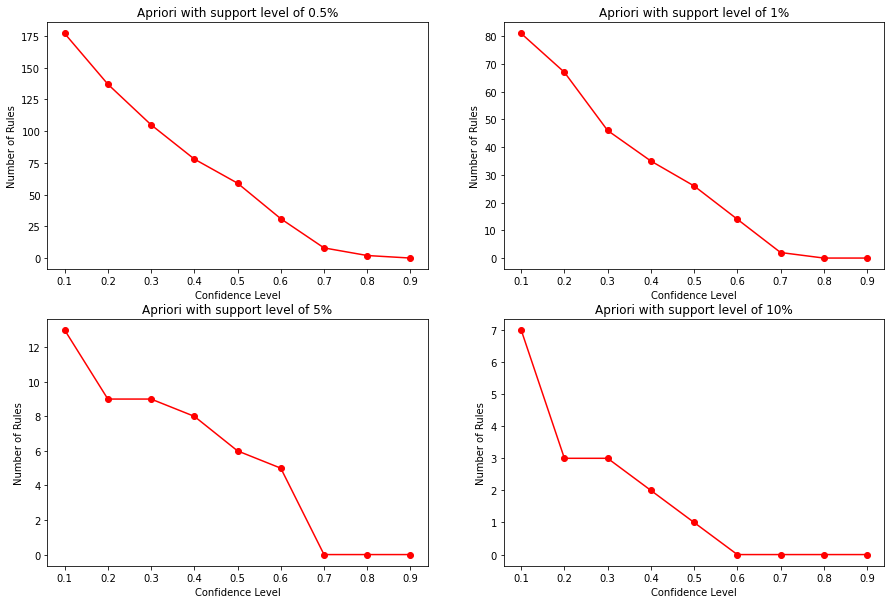

In [48]:
support = [0.5, 1, 5, 10]

plt.figure(figsize=(15,10))
for index, _ in enumerate(allRulesCount):
    plt.subplot(2,2,index+1)
    plt.plot(confidenceList,allRulesCount[index], marker="o",linestyle="-", color="r")
    plt.xlabel("Confidence Level")
    plt.ylabel("Number of Rules")
    plt.title('Apriori with support level of {}%'.format(support[index]))

plt.show()

In [50]:
rules = apriori(transactions, min_support = 0.01, min_confidence = 0.5)

for rule in rules:
    print(list(rule.ordered_statistics[0].items_base), '-->', list(rule.ordered_statistics[0].items_add),
        'Support:',rule.support, 'Confidence:', rule.ordered_statistics[0].confidence )


[] --> ['Coffee'] Support: 0.562291523269974 Confidence: 0.562291523269974
['Alfajores'] --> ['Coffee'] Support: 0.034732885053211204 Confidence: 0.5979945305378305
['Brownie'] --> ['Coffee'] Support: 0.033991634457563404 Confidence: 0.5676392572944298
['Cake'] --> ['Coffee'] Support: 0.09239159210038651 Confidence: 0.6056924678930927
['Cookies'] --> ['Coffee'] Support: 0.049346111081696405 Confidence: 0.6012903225806451
['Hearty & Seasonal'] --> ['Coffee'] Support: 0.010165722454598401 Confidence: 0.6254071661237786
['Hot chocolate'] --> ['Coffee'] Support: 0.053899507597818606 Confidence: 0.6009445100354192
['Jammie Dodgers'] --> ['Coffee'] Support: 0.012177688357071002 Confidence: 0.5609756097560976
['Juice'] --> ['Coffee'] Support: 0.042145391009689205 Confidence: 0.6039453717754174
['Medialuna'] --> ['Coffee'] Support: 0.055276115846878804 Confidence: 0.6385321100917432
['Mineral water'] --> ['Coffee'] Support: 0.0122835812993064 Confidence: 0.5178571428571428
['Muffin'] --> ['Cof